<a href="https://colab.research.google.com/github/chrisnelsonlab/BMEG4983_2024/blob/main/W7_2024_BMEG4983.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://brand.uark.edu/_resources/images/UA_Logo_Horizontal.jpg width="400" height="96">

####BMEG 4983 - Genome Engineering and Synthetic Biology -
####For more information, check out the Nelson lab for Therapeutic Genome Engineering (https://nelsonlab.uark.edu/)

For image credits, see the linked URL

#7. Data Workshop 7 - RNAseq analysis

The goal for today is to understand the processing required for analyzing RNAseq data (we won't do this ourselves) and then analyze differential data in pandas and make some plots.

#7.1 RNA seq analysis - from fastq to differential expression

Processing steps:

**Quality Control (QC):** TODAY

Perform quality control checks on raw sequencing reads using tools like FastQC.
Evaluate sequence quality metrics such as per-base sequence quality, GC content, sequence duplication levels, and adapter contamination.

<img src=https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc.png width="400" height="96">

Compare these:

https://www.bioinformatics.babraham.ac.uk/projects/fastqc/good_sequence_short_fastqc.html

https://www.bioinformatics.babraham.ac.uk/projects/fastqc/bad_sequence_fastqc.html



**Read Trimming and Filtering:** TODAY

Trim and filter raw sequencing reads to remove low-quality bases and adapter sequences using tools like Trimmomatic, Cutadapt, or Fastp.
Optionally, perform quality-based trimming to improve the overall quality of the reads.


**Read Alignment:** NEXT

Map trimmed reads to a reference genome or transcriptome using alignment software such as HISAT2, STAR, or Bowtie.
For de novo transcriptome assembly, skip this step and proceed to assembly.


**Read Quantification:** NEXT

Quantify gene or transcript expression levels from aligned reads using tools like featureCounts, HTSeq, or Salmon.
Generate count tables containing the number of reads mapped to each gene or transcript in the reference annotation.


**Normalization:** Next

Normalize expression data to account for differences in library size and sequencing depth.
Common normalization methods include TPM (Transcripts Per Million), FPKM (Fragments Per Kilobase Million), or DESeq2's normalization methods.


**Differential Expression Analysis:** Next

Identify genes or transcripts that are differentially expressed between experimental conditions or sample groups.
Perform statistical tests such as edgeR, DESeq2, or limma-voom to detect significant changes in expression levels.
Consider adjusting for confounding factors such as batch effects or experimental covariates.


**Functional Analysis:** On your own

Interpret differentially expressed genes/transcripts by performing enrichment analysis using tools like Gene Ontology (GO), Kyoto Encyclopedia of Genes and Genomes (KEGG), or Reactome pathways.
Explore biological processes, molecular functions, and pathways enriched with differentially expressed genes to gain insights into underlying biological mechanisms.


**Visualization:** Next


Visualize expression profiles, differential expression results, and pathway enrichment analysis using tools like ggplot2 (in R), Matplotlib (in Python), or other plotting libraries.
Generate heatmaps, volcano plots, PCA plots, and pathway diagrams to visualize and interpret the results effectively.
Validation:


Validate findings through experimental validation techniques such as qPCR, western blotting, or functional assays to confirm the biological relevance of differentially expressed genes/transcripts.


**Data Sharing and Reporting:** Discussion

Document analysis procedures, parameters, and results for reproducibility and transparency. Share processed data, analysis scripts, and results in repositories or publications for community access and scientific communication.

In [ ]:
!pip install biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.8 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
from urllib.request import urlretrieve
import os
import sys
import matplotlib.pyplot as plt

# Replace 'your_file.fastq' with the path to your FASTQ file
fastq_url = 'https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983_2024/main/SampleRNAseq_R1.fq'



local_file_fastq = "RNAseq_R1.fq" #rename this
if not os.path.exists(local_file_fastq):
      urlretrieve(fastq_url, local_file_fastq)

phred_scores = []
records = SeqIO.parse(local_file_fastq, "fastq")
records_list = list(records) #Note, not memory efficient

for record in records_list:#SeqIO.parse(local_file_fastq, "fastq"):
    #this is the first line - you can use it to store information about the read
    print(record.id)
    #this is the actual sequence
    print(record.seq)
    #This line prints out the phred quality. Notice with biopython it has already
    #converted this to a numerical value for you. Also notice that is a dictionary
    #that has a single element in it (phred_quality) that has a list of values
    print(record.letter_annotations)

    #That means you could average the phred quality
    #this line prints out the averag phred quality
    #try messing with the data that comes out of this
    #use the type() funciton if you get stuck

    phred_scores.append(sum(record.letter_annotations["phred_quality"])/len((record.letter_annotations["phred_quality"])))



E150016646L1C001R00100000045/1
GTGTGAGGTAGGGAGGCAAATTAAGTTTACATTTGAGGATTTTGTCAATTGTTTTCTTTCTATTCTCCTCAGTGAATGGAGGTGCTCCAGTCAGCATGTCATACATTAATGGTGCCAAACTCCACCAATCCACAGCATGGTTGTGGTCGG
{'phred_quality': [37, 36, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 36, 37, 37, 36, 35, 37, 34, 37, 37, 38, 37, 28, 37, 37, 37, 37, 38, 37, 37, 37, 37, 38, 36, 36, 37, 35, 38, 37, 37, 37, 38, 37, 37, 27, 37, 32, 26, 37, 34, 37, 37, 35, 38, 37, 37, 38, 37, 33, 38, 37, 38, 35, 26, 37, 19, 34, 8, 18, 33, 23, 31, 32, 36, 34, 36, 23, 9, 31, 18, 29, 34, 35, 36, 32, 31, 22, 30, 35, 35, 9, 33, 16, 25, 36, 36, 33, 23, 10, 37, 34, 37, 18, 31, 33, 34, 35, 26, 34, 34, 8, 36, 8, 29, 18, 29, 28, 29, 31, 36, 14, 8, 35, 25, 34, 34, 26, 35, 16, 31, 36, 11, 29, 16, 29, 36, 15, 23, 27, 30, 36, 27, 27, 33, 32, 8, 27, 31, 9]}
E150016646L1C001R00100000924/1
TGCACACCACAAGTTTTAATAAACATCATATATAACAAAGAATATTTCGTGTGTGGATTACTAGATGCATCTAAGAGGCAGAAAGTAAAGCACTGGACAAGAGTAATAGTGTAACTCTGATTATGCTAACGGCGACGTCAGAAGCGTCAC
{'phred_quality': [36, 3

In [ ]:
#Do the same with R2
#https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983_2024/main/SampleRNAseq_R2.fq

Try BLATing Fwd and Rev read pair (try a couple)

Here is the first read

<img src=https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983_2024/main/Read1align.png>

ID: E150016646L1C001R00100000045/1
Name: E150016646L1C001R00100000045/1
Description: E150016646L1C001R00100000045/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('GTGTGAGGTAGGGAGGCAAATTAAGTTTACATTTGAGGATTTTGTCAATTGTTT...CGG')
[37, 36, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 36, 37, 37, 36, 35, 37, 34, 37, 37, 38, 37, 28, 37, 37, 37, 37, 38, 37, 37, 37, 37, 38, 36, 36, 37, 35, 38, 37, 37, 37, 38, 37, 37, 27, 37, 32, 26, 37, 34, 37, 37, 35, 38, 37, 37, 38, 37, 33, 38, 37, 38, 35, 26, 37, 19, 34, 8, 18, 33, 23, 31, 32, 36, 34, 36, 23, 9, 31, 18, 29, 34, 35, 36, 32, 31, 22, 30, 35, 35, 9, 33, 16, 25, 36, 36, 33, 23, 10, 37, 34, 37, 18, 31, 33, 34, 35, 26, 34, 34, 8, 36, 8, 29, 18, 29, 28, 29, 31, 36, 14, 8, 35, 25, 34, 34, 26, 35, 16, 31, 36, 11, 29, 16, 29, 36, 15, 23, 27, 30, 36, 27, 27, 33, 32, 8, 27, 31, 9]
GTGTGAGGTAGGGAGGCAAATTAAGTTTACATTTGAGGATTTTGTCAATTGTTTTCTTTCTATTCTCCTCAGTGAATGGAGGTGCTCCAGTCAGCATGTCATACATTAATGGTGCCAAACTCCACCAATCCACAGCATGGTTGTGGTCGG
8
8
8


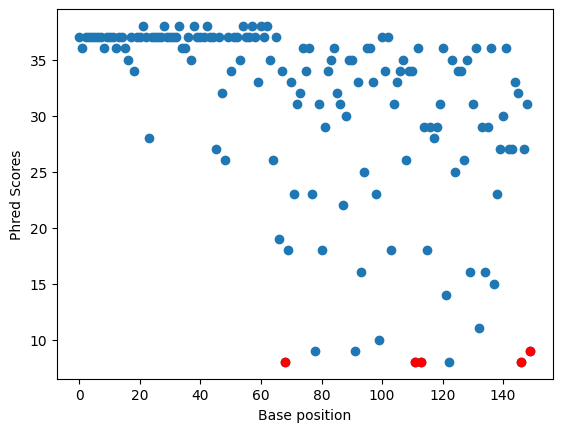

In [ ]:
#Let's look at read 1 (fwd read only) sequence quality by base
#Notice it isn't perfect?

recordA = records_list[0] #access the first sequence
#recordB = records_list[1]
#recordC = records_list[90]

#what is inside?
print(recordA)

#Let's grab just the sequence quality
print(recordA.letter_annotations["phred_quality"])

#Store it in a variable list
recordA_score = recordA.letter_annotations["phred_quality"]
#recordB_score = recordB.letter_annotations["phred_quality"]
#recordC_score = recordC.letter_annotations["phred_quality"]
x_values = range(len(recordA_score))

plt.scatter(x_values, recordA_score,linewidth=1)
#plt.scatter(x_values, recordB_score,linewidth=1)
#plt.scatter(x_values, recordC_score,linewidth=1)
plt.xlabel('Base position')
plt.ylabel('Phred Scores')
print(recordA.seq)
#yikes. Where are the miscalls?
#position 69 (68 if indexed at 0)
#also 112 and 114 (111, 113)
print(recordA_score[68])
print(recordA_score[111])
print(recordA_score[113])

#label the miscalls
plt.scatter(68, recordA_score[68],linewidth=1, color='red')
plt.scatter(111, recordA_score[111],linewidth=1,color='red')
plt.scatter(113, recordA_score[113],linewidth=1,color='red')
plt.scatter(149, recordA_score[149],linewidth=1,color='red')
plt.scatter(146, recordA_score[146],linewidth=1,color='red')

In [75]:
#ERROR

#Try to loop to show all data

arr = [[0]*100]*150
for i,record in enumerate(records_list):
  for j in range(0,150):
    arr[j][i] = record.letter_annotations["phred_quality"]
#print(arr[0])
from numpy import transpose
print(arr)
newarrinv = transpose(arr)
print(newarrinv)
fig = plt.figure()

fig.set_size_inches(20, 5)
plt.boxplot(arr)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: X must have 2 or fewer dimensions

Error in callback <function flush_figures at 0x7a0a83520280> (for post_execute):


KeyboardInterrupt: 

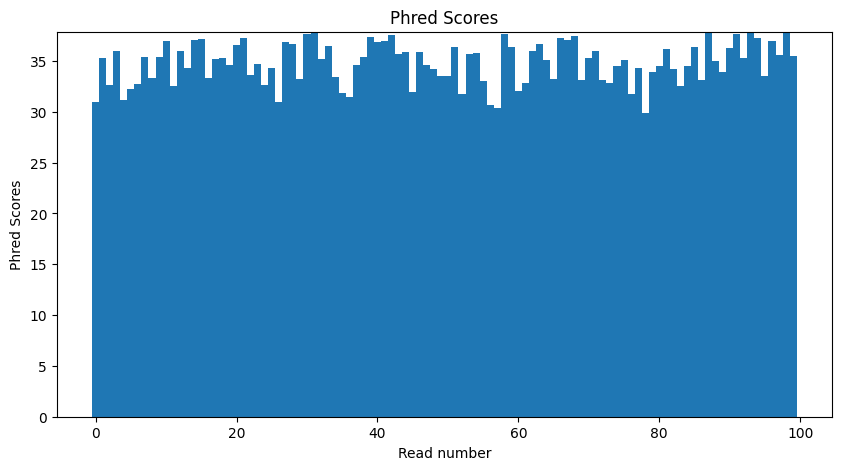

In [ ]:
#Try graphing the average PHRED scores

#print(phred_scores)
x_values = range(len(phred_scores))

# Plot the data
fig = plt.figure()

fig.set_size_inches(10, 5)
plt.bar(x_values, phred_scores, width=1,linewidth=2)
plt.margins(0.05, 0)
# Add labels and title
plt.xlabel('Read number')
plt.ylabel('Phred Scores')
plt.title('Phred Scores')


# Show the plot
plt.show()


What about a sliding window? This is how trimmomatic works

Let's try a window of 4 and a average phred of 20

In [ ]:
window = 4
avg_phred_cutoff = 20

for i in range(0,len(recordA_score)-window):
  print(sum(recordA_score[i:i+window])/window)
  if(sum(recordA_score[i:i+window])/window<avg_phred_cutoff):
    print("STOP")
    print(i)

36.75
36.75
37.0
37.0
37.0
36.75
36.75
36.75
36.75
36.75
36.75
36.75
36.5
36.25
36.25
35.5
35.75
36.25
36.5
37.25
35.0
35.0
34.75
34.75
37.0
37.25
37.25
37.25
37.25
37.0
37.25
37.0
36.75
36.75
36.0
36.5
36.75
36.75
37.25
37.25
37.25
37.25
34.75
34.5
33.25
30.5
33.0
32.25
33.5
36.25
35.75
36.75
36.75
36.75
37.5
37.25
36.25
36.5
36.25
36.5
37.0
34.0
34.0
29.25
29.0
24.5
19.75
STOP
66
23.25
20.5
26.25
29.75
30.5
33.25
34.5
32.25
25.5
24.75
20.25
21.75
28.0
29.0
33.5
34.25
33.5
30.25
28.75
29.5
30.5
27.25
28.0
23.25
20.75
27.5
28.25
32.5
32.0
25.5
25.75
26.0
29.5
31.5
30.0
29.75
29.0
33.25
32.0
32.25
32.25
25.5
28.0
21.5
20.25
22.75
21.0
26.0
26.0
29.25
31.0
27.5
22.25
23.25
20.5
25.5
32.0
29.75
32.25
27.75
27.0
29.5
23.5
26.75
23.0
21.25
27.5
24.0
25.75
25.25
23.75
29.0
30.0
30.0
30.75
29.75
25.0
25.0
24.5
